<a href="https://colab.research.google.com/github/helah20/Machine_learning/blob/main/seattle_weather_1948_2017_Day3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Group members :**
- Abeer  AlGhamdi
- Afrah Alharbi
- Hailah Alharthi

# Confusion Matrix

#### Dataset Options
1. Binary Classification Dataset of Your Choice
2. Seattle Rain Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv`
    - Note: target is `RAIN`
3. Titanic Dataset
    - `https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/titanic.csv`
3. Customer Churn
    - `https://github.com/gumdropsteve/intro_to_machine_learning/raw/main/day_05/data/churn_data.csv`
    - [Data dict](https://docs.google.com/document/d/1SxzoPHWxoLHx_kiPTZEzZOoda2chHbHLdMGAFsGIqCY/edit?usp=sharing)
    - Note: target is `Churn`
4. Iris dataset
    - `https://raw.githubusercontent.com/gumdropsteve/datasets/master/iris.csv`
    - Note: 3 possible classes

1. Load in your dataset.

In [165]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 


In [166]:
df=pd.read_csv('https://github.com/daniel-dc-cd/data_science/raw/master/module_3_Python/data/seattle_weather_1948-2017.csv')

2. Find out some information about the data...

In [167]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [168]:
df.tail()

,DATE,PRCP,TMAX,TMIN,RAIN
25546,2017-12-10,0.0,49,34,False
25547,2017-12-11,0.0,49,29,False
25548,2017-12-12,0.0,46,32,False
25549,2017-12-13,0.0,48,34,False
25550,2017-12-14,0.0,50,36,False


In [169]:
df.isna().sum()

DATE    0
PRCP    3
TMAX    0
TMIN    0
RAIN    3
dtype: int64

In [170]:
# Dealing with missing values:]
df['PRCP']=df['PRCP'].fillna(df['PRCP'].median())
df['RAIN']=df['RAIN'].fillna(df['RAIN'].median())


In [171]:
df.isna().sum()

DATE    0
PRCP    0
TMAX    0
TMIN    0
RAIN    0
dtype: int64

In [172]:
df.describe()


,PRCP,TMAX,TMIN
count,25551.000000,25551.000000,25551.000000
mean,0.106209,59.544206,44.514226
std,0.239020,12.772984,8.892836
min,0.000000,4.000000,0.000000
25%,0.000000,50.000000,38.000000
50%,0.000000,58.000000,45.000000
75%,0.100000,69.000000,52.000000
max,5.020000,103.000000,71.000000


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


In [174]:
df.shape

(25551, 5)

3. Show me the relationships in your data... 
- corr ([help](https://stackoverflow.com/a/50703596/11074111))
- pariplot
- some other visualizations (of your choice)

In [175]:
corr=df.corr
corr

<bound method DataFrame.corr of              DATE  PRCP  TMAX  TMIN   RAIN
0      1948-01-01  0.47    51    42   True
1      1948-01-02  0.59    45    36   True
2      1948-01-03  0.42    45    35   True
3      1948-01-04  0.31    45    34   True
4      1948-01-05  0.17    45    32   True
...           ...   ...   ...   ...    ...
25546  2017-12-10  0.00    49    34  False
25547  2017-12-11  0.00    49    29  False
25548  2017-12-12  0.00    46    32  False
25549  2017-12-13  0.00    48    34  False
25550  2017-12-14  0.00    50    36  False

[25551 rows x 5 columns]>

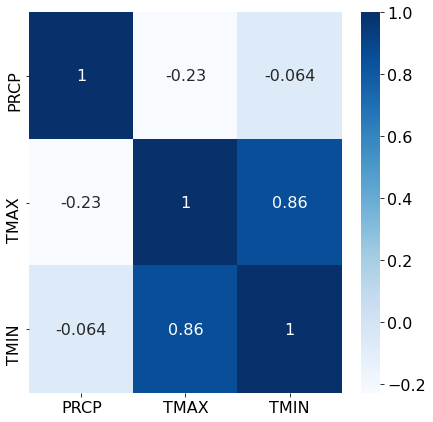

In [176]:
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(), annot=True , cmap='Blues')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


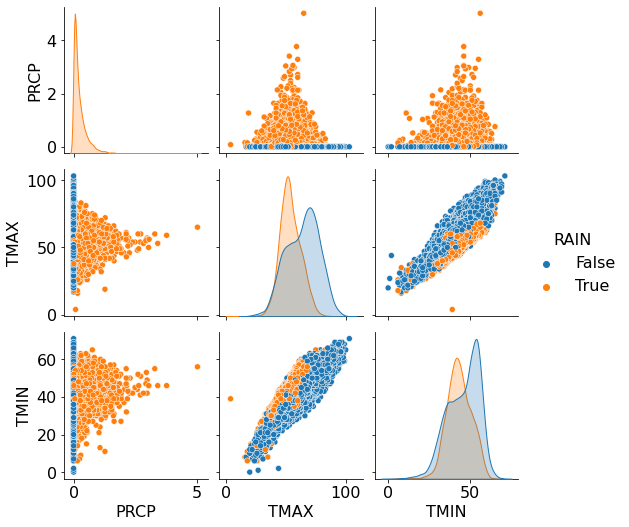

In [177]:
sns.pairplot(df, hue='RAIN');

In [178]:
df.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'RAIN'], dtype='object')

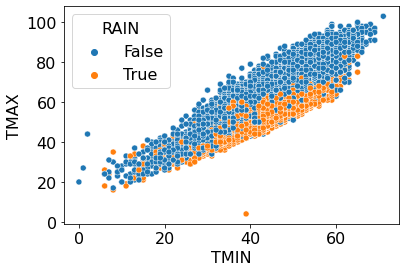

In [179]:
sns.scatterplot(x='TMIN', y='TMAX',hue='RAIN' , data=df)

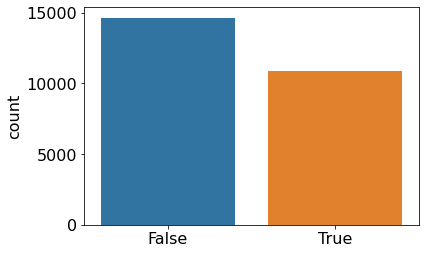

In [180]:
sns.countplot(x=df['RAIN'].values)

4. Perform any data prep that needs to be done before splitting...

Note: may not be necessary, may require more cells

In [181]:

# convert string values to 0 and 1 - binary
df['RAIN'] = df['RAIN'].map({True:1 ,False:0}) 

In [182]:
df.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,1
1,1948-01-02,0.59,45,36,1
2,1948-01-03,0.42,45,35,1
3,1948-01-04,0.31,45,34,1
4,1948-01-05,0.17,45,32,1



5. Split your data into training and testing datasets...

In [183]:
from sklearn.model_selection import train_test_split

X = df[['PRCP']]
y = df.RAIN

X_train, X_test, y_train, y_test = train_test_split(X, y,  train_size=0.7, random_state=42)

6. Import, create, and fit a LogisticRegression model with 1 variable

In [184]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [185]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

6. Make predictions on your `X_test` values...

In [186]:
# make predictions
preds = lr.predict(X_test)


In [187]:
# what do they look like? (show me some of the predictions)
preds

array([1, 1, 1, ..., 0, 0, 0])

7. Score your model...
- accuracy_score

In [188]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)  

0.915992695016958

8. Confustion Matrix

In [189]:
from sklearn.metrics import confusion_matrix

# make confusion matrix
cf = confusion_matrix(y_test, preds)

9. Explain your confusion matrix...
- How many of each value (TP, FP, TN, FN) do you have?
- What does each mean?

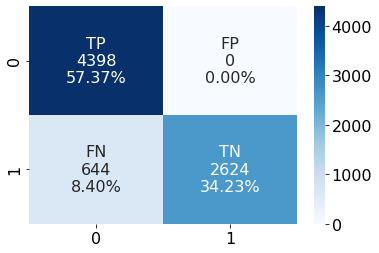

In [190]:
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')



we have the following output : 

 TP 4398

 FP 0
 
 TN 644
 
 FN 2624



10. Create, and fit a LogisticRegression model with **more than** 1 variable

In [191]:
X = df[['TMAX', 'TMAX', 'PRCP']]
y = df.RAIN

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42 ) # random_state to use the same train data every time 

In [192]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [193]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

11. Make predictions on your `X_test` values...

In [194]:
# make predictions
preds = lr.predict(X_test)

In [195]:
# what do they look like? (show me some of the predictions)
preds

array([1, 1, 1, ..., 0, 0, 0])

12. Score your model...
- accuracy_score


In [196]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds)  

0.9162535872684582

13.  Confustion Matrix

In [197]:
from sklearn.metrics import confusion_matrix

# make confusion matrix
cf = confusion_matrix(y_test, preds)

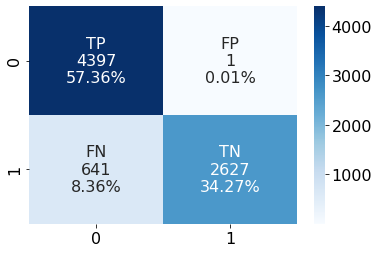

In [198]:
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')



14.  Explain your confusion matrix...
- How many of each value do you have?
- What does each mean?

we have the following output :

TP 4397

FP 1

TN 641

FN 2627

**we have hiegh  true positve and true negative  and we did not have any  value of false positive in both models , that's mean the accurcy with multiple features is seams to be more accurate**





15. Which model is better? Why?

**the 2nd model is better , becuase the accurcy score with multiple features is seams to be more accurate**

0.915992695016958 (with one variable) <

0.9162535872684582 (with multiple variable)

## Bonus

16. Perform GridSearchCV with the better data

In [199]:
from sklearn.model_selection import GridSearchCV

p_grid = {'fit_intercept': [True, False],
          'solver':[ "newton-cg", "lbfgs", "liblinear", "sag", "saga"],
          'max_iter': [100, 150, 200,250,500, 10000]
}

grid = GridSearchCV(lr, p_grid, cv=7)
grid

GridSearchCV(cv=7, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'fit_intercept': [True, False],
                         'max_iter': [100, 150, 200, 250, 500, 10000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

In [ ]:
grid.fit(X_train, y_train)

In [201]:
grid.best_params_

{'fit_intercept': True, 'max_iter': 100, 'solver': 'newton-cg'}

17. Update the hyperparameters of your model (create and fit a new model with the results of GridSerachCV)

In [202]:
lr = LogisticRegression(fit_intercept=True, max_iter= 100, solver='newton-cg')

In [203]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [204]:
# make predictions
preds = lr.predict(X_test)
preds

array([1, 1, 1, ..., 0, 0, 0])

14. Accuracy Score and Confusion Matrix

In [205]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, preds) 



0.9162535872684582

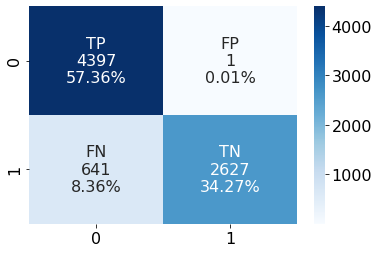

In [206]:
group_names = ['TP','FP','FN','TN']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf.flatten()/np.sum(cf)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf, annot=labels, fmt='', cmap='Blues')


Did the score change at all? Why?

**Models have a same accurcy score**

0.9162535872684582

### Bonus Bonus
Figure out ROC plot. Tell me about it.

**fpr** :

Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].

**tpr** :


Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].

**threshold** :

Decreasing thresholds on the decision function used to compute fpr and tpr. thresholds[0] represents no instances being predicted and is arbitrarily set to max(y_score) + 1.

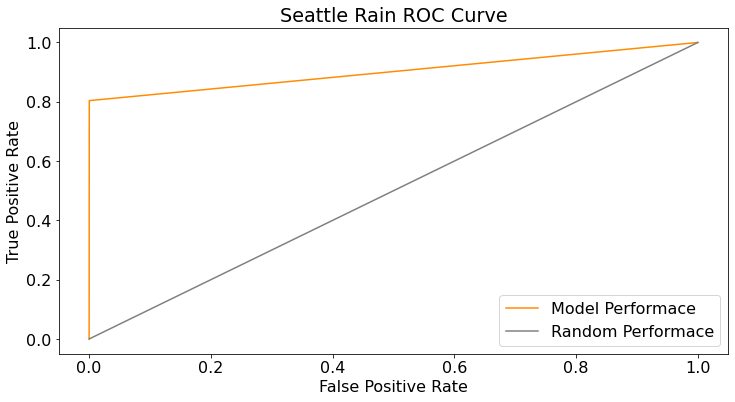

In [207]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, preds)

fig, ax = plt.subplots(1, figsize=(12, 6))
plt.plot(fpr, tpr, color='darkorange', label='Model Performace')
plt.plot([0, 1], [0, 1], color='gray', label='Random Performace')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Seattle Rain ROC Curve')
plt.legend(loc="lower right")

In [208]:
roc_auc_score(y_test,lr.predict_proba(X_test)[:,1])

0.9831999133911431

**we had hiegh score of ROC , which means as we understand the modele performance is perty good .**